In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Маємо рівняння $g(y)=\frac{dy}{dx}= y^2 -1$
#### 2.1 Зобразити векторне поле в точках $\pm 1, \pm 2, \pm 3, \pm 4$
#### 2.2 Зобразити інтегральні криві рівняння. Чи має рівняння розв'язки визнвчені на R

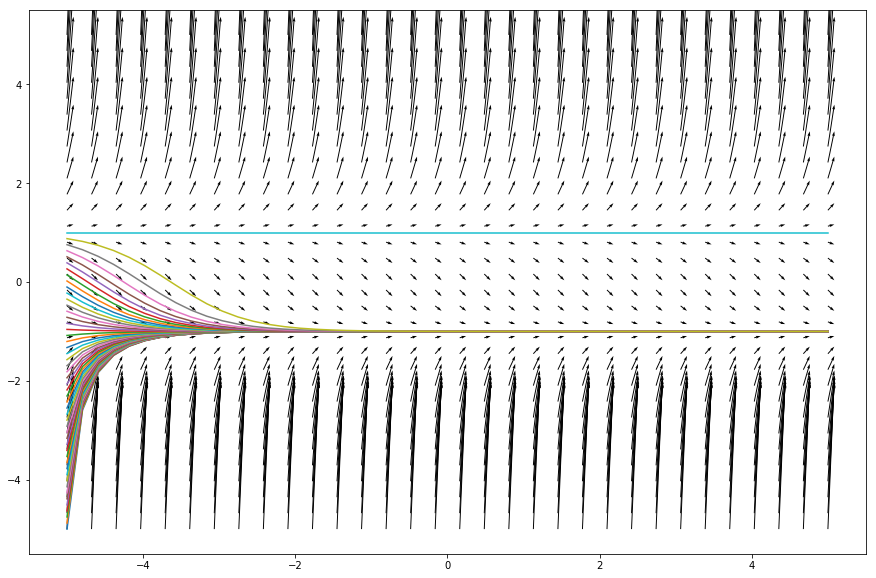

In [3]:
def g(y,t=0):
    dxdy = y**2 - 1
    return dxdy

fig = plt.gcf()
fig.set_size_inches(15, 10)


X = np.linspace(-5, 5, 32)
Y = np.linspace(-5, 5, 32)

U = [1 for i in range(32)]
V = [g(i) for i in Y]

XX, YY = np.meshgrid(X, Y)

UU, VV = np.meshgrid(U, V)


plt.quiver(XX, YY, UU, VV, units='xy', width=0.015, scale=10)


for y0 in np.linspace(-5, 1):
    t = np.linspace(-5, 5)
    plt.plot(t, odeint(g, y0, t))

plt.show()

#### 2.3 Знайти множину точок перегину інтегральних кривих рівняння

Точки перегину функції визначаються нулями другої похідної

$$y' = f(x, y)$$
$$y'' = \frac{\partial f}{\partial x}dx + \frac {\partial f}{\partial y}dy = 
f^{'}_{x} + f^{'}_{y}y' = 0$$

In [4]:
from sympy import *
x, y = symbols('x y')
f = y**2 - 1
ddy = diff(f,x) + diff(f,y)*f
print(ddy)
points = solve(ddy,y)

2*y*(y**2 - 1)


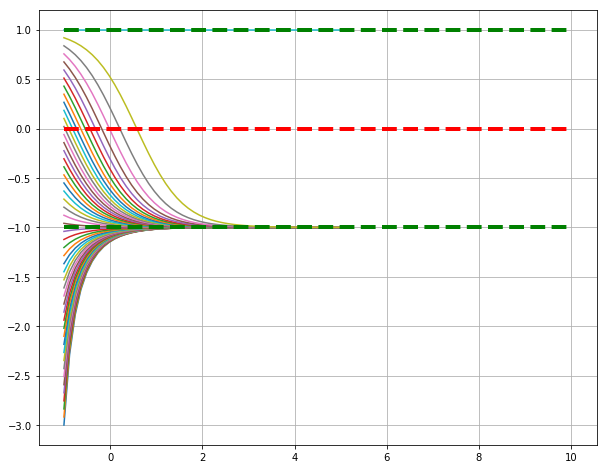

In [5]:
fig = plt.gcf()
fig.set_size_inches(10, 8)

for y0 in np.linspace(-3, 1):
    t = np.linspace(-1, 5)
    plt.plot(t, odeint(g, y0, t))
plt.grid(axis='both')
t = np.linspace(-1, 10, 2)
plt.plot(t, (-1, -1), 'g--', t, (0, 0), 'r--', t, (1, 1), 'g--', linewidth=4)
plt.show()

отож, точка перегину - y = 0 

### 2.4 

In [19]:
y = symbols('y', cls=Function)

In [21]:
diffeq = Eq(y(x).diff(x),y(x)**2-1)
pprint(diffeq)

d           2       
──(y(x)) = y (x) - 1
dx                  


Знайдемо загальний розв'зок

In [22]:
sol = dsolve(diffeq, y(x))
pprint(sol)

            1      
y(x) = ────────────
       tanh(C₁ - x)


In [24]:
y0 = symbols('y_0')
cond_sol = sol.subs([(x,0),(y,y0)])
pprint(cond_sol)

          1    
y(0) = ────────
       tanh(C₁)


In [18]:

sol = dsolve(diffeq, y(x)).rhs
#constants = solve([sol.subs(x,0)])
#solve = dsolve(diffeq, y(x), ics={y(2):0.5})

pprint(sol)
sol2 = Eq(sol.subs(x,0),0)
constants = solve(sol2)
constants[1].subs(I,1)

     1      
────────────
tanh(C₁ - x)


pi/2

In [11]:
from sympy.solvers.ode import solve_ics